<a href="https://colab.research.google.com/github/hetpatel007/GIS-1/blob/main/ps_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Resaerch Intesrest**


In this Project ,
I am working to map to correlation between literacy rate and unemployment rate accross states in India

## **Libraries**

In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [2]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 799.3 kB/s eta 0:00:00


## mapping your area of interest

*   In the code we found the zip file ,unzipped it and found the shape file of india ,after which we plot it.

In [3]:
! wget -q -O GIS_INDIA_MAP.zip https://drive.google.com/uc?id=1BHlY3nu1CY1eg0ULpvQDbYobmXMQaB9N&export=download
zip_ref = zipfile.ZipFile('GIS_INDIA_MAP.zip', 'r'); zip_ref.extractall(); zip_ref.close()

In [4]:
Ind = gpd.read_file('India States/Indian_states.shp')

<Axes: >

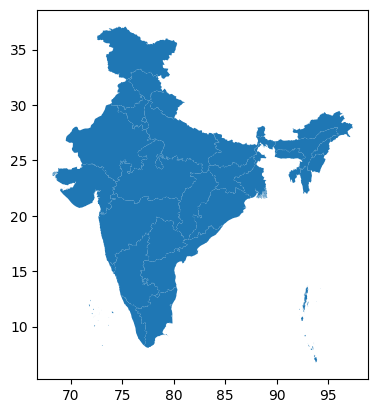

In [5]:
Ind.plot()

# **Data Types and columns in the shapefile**

In [6]:
Ind.dtypes

st_nm         object
geometry    geometry
dtype: object

In [20]:
import pandas as pd
# Rename columns using the rename() method
Ind = Ind.rename(columns={'st_nm': 'State'})

In [21]:
Ind.dtypes

State         object
geometry    geometry
dtype: object

In [22]:
Ind['State'].count()

36

## Unemployment in India
Map 1

In [7]:
! wget -q -O up_df.csv https://drive.google.com/uc?id=1o3dQsYfZzpAA0-gBOW3b32Evh3vjFP5d&export=download


In [11]:
df_unemp = pd.read_csv("up_df.csv")

In [12]:
df_unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [13]:
df_unemp.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [16]:
df_unemp=df_unemp.rename(columns={'Region':'State'})

In [17]:
df_unemp['State'].nunique()

28

In [23]:
#merge
#njC1 = pd.merge(njC, zil1, on='COUNTY',how='outer',indicator=True)
df_1 = pd.merge(Ind, df_unemp, on='State',how='outer',indicator=True)

In [27]:
df_1[['State',' Date',' Estimated Unemployment Rate (%)','Area','_merge']]

,State,Date,Estimated Unemployment Rate (%),Area,_merge
0,Andaman & Nicobar Island,NaN,NaN,NaN,left_only
1,Arunanchal Pradesh,NaN,NaN,NaN,left_only
2,Assam,31-05-2019,4.29,Rural,both
3,Assam,30-06-2019,5.08,Rural,both
4,Assam,31-07-2019,4.26,Rural,both
...,...,...,...,...,...
772,NaN,NaN,NaN,NaN,right_only
773,NaN,NaN,NaN,NaN,right_only
774,NaN,NaN,NaN,NaN,right_only
775,NaN,NaN,NaN,NaN,right_only


In [ ]:
#aok investigate _merge--make sure everything ok

In [19]:
df_2 = pd.merge(Ind, df_unemp, on='State',how='inner',indicator=False)

KeyError: ignored

In [28]:
df_1.dtypes

State                                         object
geometry                                    geometry
 Date                                         object
 Frequency                                    object
 Estimated Unemployment Rate (%)             float64
 Estimated Employed                          float64
 Estimated Labour Participation Rate (%)     float64
Area                                          object
_merge                                      category
dtype: object

## Took relevant columns

In [29]:
df_1 = df_1[['State',' Date',' Estimated Unemployment Rate (%)','Area','_merge','geometry']]

In [ ]:
df_1 = df_1.iloc[2:]

In [30]:
df_1.shape

len(df_1)

(777, 6)

777

aok: so you have 777 obs and you make a map wih like 20 or so areas??? subset first drop stuff you dont need or aggregate or something but do not map 777 as 20 someting

<Axes: >

[]

[]

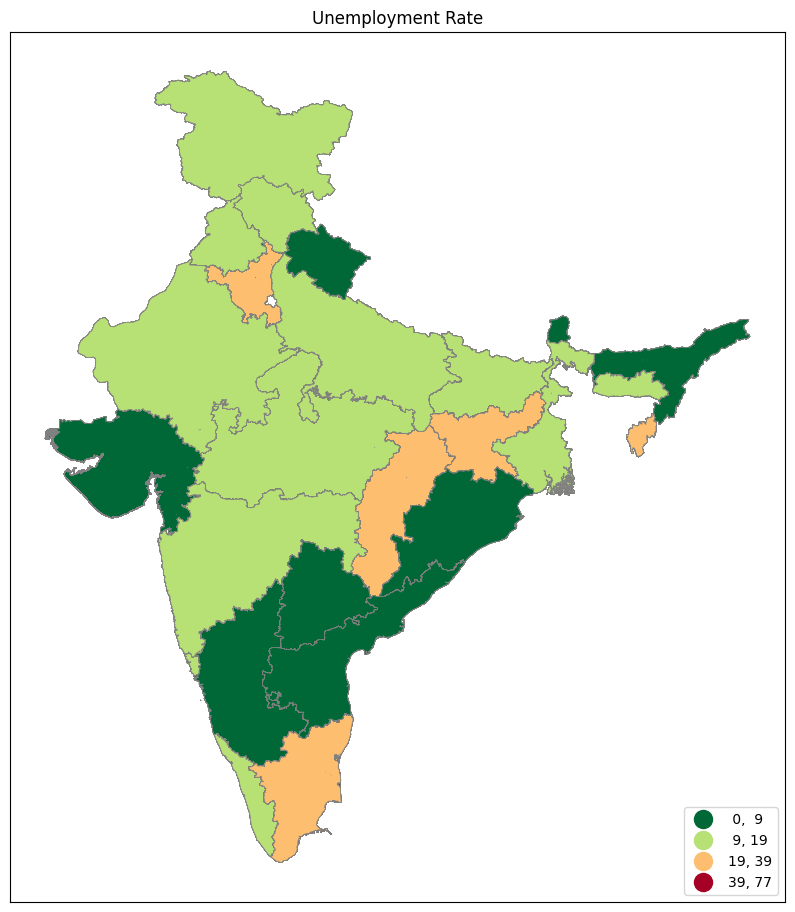

In [31]:
fig, ax = plt.subplots(1, figsize=(10,12))
df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

##MAP 2
Literacy rate

In [ ]:
! wget -q -O lit_df.csv "https://drive.google.com/uc?id=1o9gOvKIMbAIKk5HBHGfBPh3DY617TiEW&export=download"

In [ ]:
df_literacy = pd.read_csv("lit_df.csv")

In [ ]:
df_literacy.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2019,Literacy Rate (Persons) - Total - 2019.1,Literacy Rate (Persons) - Rural - 2019,Literacy Rate (Persons) - Rural - 2019.1,Literacy Rate (Persons) - Urban - 2019,Literacy Rate (Persons) - Urban - 2019.1
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [ ]:
df_literacy.dtypes

Category                                     object
Country/ States/ Union Territories Name      object
Literacy Rate (Persons) - Total - 2019      float64
Literacy Rate (Persons) - Total - 2019.1    float64
Literacy Rate (Persons) - Rural - 2019      float64
Literacy Rate (Persons) - Rural - 2019.1    float64
Literacy Rate (Persons) - Urban - 2019      float64
Literacy Rate (Persons) - Urban - 2019.1    float64
dtype: object

In [ ]:
df_literacy.rename(columns= {'Country/ States/ Union Territories Name' : 'State','Literacy Rate (Persons) - Total - 2019' : 'Literacy_rate'}, inplace=True)
df_literacy.head(10)

,Category,State,Literacy_rate,Literacy Rate (Persons) - Total - 2019.1,Literacy Rate (Persons) - Rural - 2019,Literacy Rate (Persons) - Rural - 2019.1,Literacy Rate (Persons) - Urban - 2019,Literacy Rate (Persons) - Urban - 2019.1
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9
5,State,Chhattisgarh,64.7,70.3,60.5,66.0,80.6,84.0
6,State,Goa,82.0,88.7,79.7,86.6,84.4,90.0
7,State,Gujarat,69.1,78.0,61.3,71.7,81.8,86.3
8,State,Haryana,67.9,75.6,63.2,71.4,79.2,83.1
9,State,Himachal Pradesh,76.5,82.8,75.1,81.9,88.9,91.1


In [ ]:
df_literacy = df_literacy.drop(df_literacy.index[0])

In [ ]:
df_literacy.head(3)

,Category,State,Literacy_rate,Literacy Rate (Persons) - Total - 2019.1,Literacy Rate (Persons) - Rural - 2019,Literacy Rate (Persons) - Rural - 2019.1,Literacy Rate (Persons) - Urban - 2019,Literacy Rate (Persons) - Urban - 2019.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5


In [ ]:
Literacy_df = pd.merge(Ind,df_literacy, on='State',how='outer',indicator=True)
#print(C1.columns)

In [ ]:
Literacy_df_2 = pd.merge(Ind,df_literacy, on='State',how='inner',indicator=False)

In [ ]:
Literacy_df = Literacy_df[['State','Literacy_rate','geometry','_merge']]

In [ ]:
Literacy_df.shape

(39, 4)

<Axes: >

[]

[]

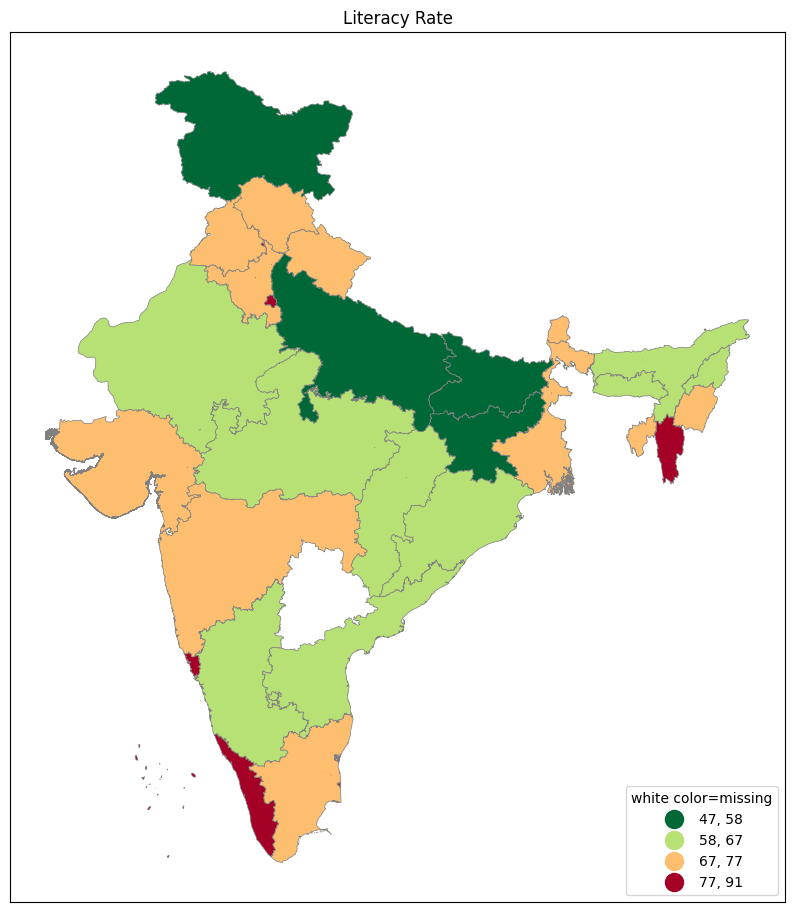

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
Literacy_df.plot(ax=ax,column='Literacy_rate',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Literacy Rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

### Map 3

In [ ]:
df_unemp.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
import pandas as pd
# Group by the 'column_name' column
grouped_df = df_unemp.groupby('Area')

# Perform aggregation on the grouped data, for example, sum of 'value' for each group
sum_by_group = grouped_df[' Estimated Unemployment Rate (%)'].sum()

# Display the result
print(sum_by_group)


Area
Rural    3706.60
Urban    5016.48
Name:  Estimated Unemployment Rate (%), dtype: float64


Unemployment Rate was higher in Urban areas compared to Rural areas

### Group BY

In [ ]:
df_unemp.dtypes

State                                        object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [ ]:
import pandas as pd
# Group by 'State' and calculate the mean of 'Estimated Unemployment Rate (%)'
grouped = df_unemp.groupby('State')[' Estimated Unemployment Rate (%)'].sum()

print(grouped)


State
Andhra Pradesh      209.36
Assam               167.13
Bihar               529.71
Chandigarh          191.90
Chhattisgarh        258.73
Delhi               461.87
Goa                 222.58
Gujarat             186.59
Haryana             735.93
Himachal Pradesh    519.13
Jammu & Kashmir     339.96
Jharkhand           576.38
Karnataka           186.93
Kerala              283.47
Madhya Pradesh      207.38
Maharashtra         211.61
Meghalaya           129.57
Odisha              158.42
Puducherry          265.59
Punjab              336.87
Rajasthan           393.63
Sikkim              123.24
Tamil Nadu          259.96
Telangana           216.66
Tripura             793.81
Uttar Pradesh       351.44
Uttarakhand         177.74
West Bengal         227.49
Name:  Estimated Unemployment Rate (%), dtype: float64


### Only wanted values containing rural

In [ ]:
import pandas as pd
# Define the value you want to filter by
desired_value = 'Rural'

# Create a boolean condition for filtering
condition = df_unemp['Area'] == desired_value

# Apply boolean indexing to obtain the subset
Rural_df = df_unemp[condition]

print(Rural_df)


              State         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
354     West Bengal   29-02-2020    Monthly                              3.78   
355     West Bengal   31-03-2020    Monthly                              7.02   
356     West Bengal   30-04-2020    Monthly                             18.32   
357     West Bengal   31-05-2020    Monthly                             18.43   
358     West Bengal   30-06-2020    Monthly                              4.94   

      Estimated Employed   

In [ ]:
Rural_df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
import pandas as pd
# Define the value you want to check for
desired_value = 'Urban'

# Create a boolean condition for checking
is_value_present = Rural_df['Area'].str.contains(desired_value, case=False)

# Check if the value is present in the column
if is_value_present.any():
    print(f'The value {desired_value} is present in the column.')
else:
    print(f'The value {desired_value} is not present in the column.')


The value Urban is not present in the column.


In [ ]:
import pandas as pd
# Define the value you want to filter by
desired_value = 'Urban'

# Create a boolean condition for filtering
condition = df_unemp['Area'] == desired_value

# Apply boolean indexing to obtain the subset
Urban_df = df_unemp[condition]

print(Urban_df)


              State         Date  Frequency   Estimated Unemployment Rate (%)  \
373  Andhra Pradesh   31-05-2019    Monthly                              6.09   
374  Andhra Pradesh   30-06-2019    Monthly                              3.80   
375  Andhra Pradesh   31-07-2019    Monthly                              5.64   
376  Andhra Pradesh   31-08-2019    Monthly                              4.61   
377  Andhra Pradesh   30-09-2019    Monthly                              6.01   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   

### Merge with shp file

In [ ]:
Rural_df_1 = pd.merge(Ind,Rural_df, on='State',how='outer',indicator=True)


In [ ]:

Rural_df_1[['State',' Date',' Estimated Unemployment Rate (%)','Area','_merge','geometry']]


<Axes: >

[]

[]

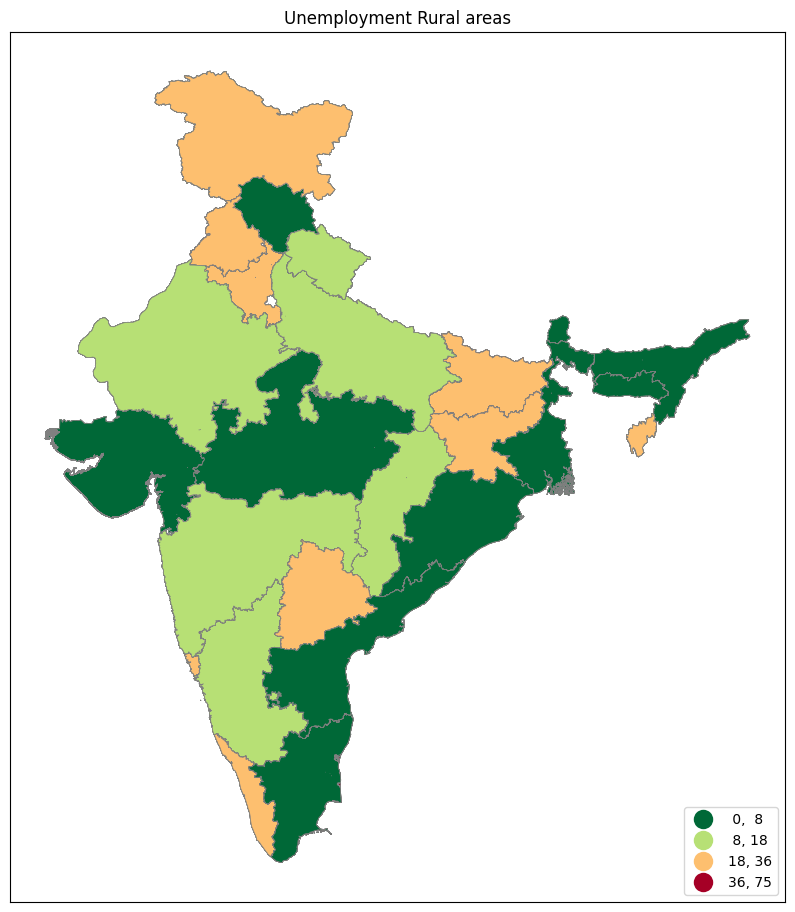

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
Rural_df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='naturalbreaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Rural areas")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [ ]:
Urban_df_1 = pd.merge(Ind, Urban_df, on='State',how='outer',indicator=True)

In [ ]:
Urban_df_1[['State',' Date',' Estimated Unemployment Rate (%)','Area','_merge','geometry']]

<Axes: >

[]

[]

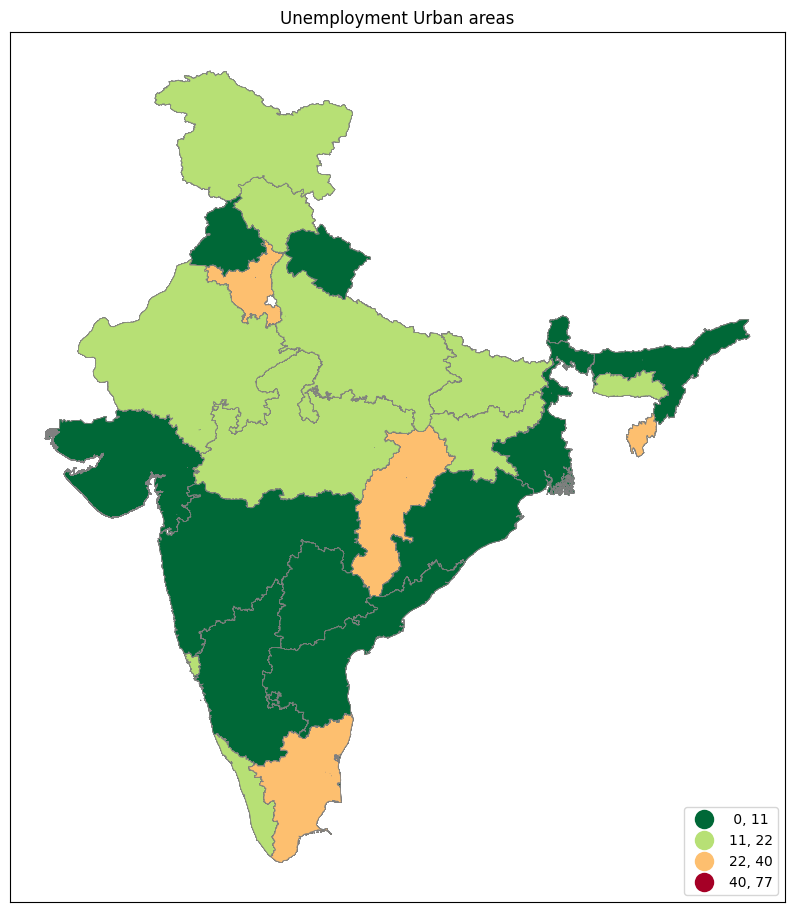

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
Urban_df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='naturalbreaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Urban areas")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


### Inference ###

By plotting both the maps we were able to discover correlation between literacy rate and unemployment. Majority of States with higher literacy has a lower unemployment rate.